# MODELO SUPERVISADO 

##### OBJETIVO: Predecir cuanta energía eólica producirán los países de America del sur en los proximos 5 años 

In [683]:
# Se importan las librerías que se utilizarán: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [684]:
# Se importa el dataset 
suram1 = pd.read_csv(r'..\\datasets\\suram1.csv')  

In [685]:
# Se consultan los datos únicos que integran la columna country 
suram1['country'].unique() 

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela'], dtype=object)

In [686]:
# Se consultan los nombres de las columnas
print(suram1.columns)

Index(['iso_code', 'country', 'year', 'coal_share_elec',
       'coal_elec_per_capita', 'electricity_generation', 'biofuel_electricity',
       'coal_electricity', 'fossil_electricity', 'gas_electricity',
       'hydro_electricity', 'nuclear_electricity', 'oil_electricity',
       'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_capita',
       'fossil_cons_per_capita', 'fossil_share_elec', 'gas_share_elec',
       'gas_elec_per_capita', 'hydro_share_elec', 'hydro_elec_per_capita',
       'low_carbon_share_elec', 'low_carbon_electricity',
       'low_carbon_elec_per_capita', 'oil_share_elec', 'oil_elec_per_capita',
       'other_renewables_elec_per_capita', 'other_renewables_share_elec',
       'per_capita_electricity', 'population', 'primary_energy_consumption',
       'renewables_elec_per_capita', 'renewables_share_elec',
       'solar_share_elec', 'solar_elec_per_cap

In [687]:
# Se observan cuántos valores faltantes tiene cada columna 
missing_values =suram1.isnull().sum().sort_values(ascending = False) 
missing_values

iso_code                                   0
gas_share_elec                             0
hydro_share_elec                           0
hydro_elec_per_capita                      0
low_carbon_share_elec                      0
low_carbon_electricity                     0
low_carbon_elec_per_capita                 0
oil_share_elec                             0
oil_elec_per_capita                        0
other_renewables_elec_per_capita           0
other_renewables_share_elec                0
per_capita_electricity                     0
population                                 0
primary_energy_consumption                 0
renewables_elec_per_capita                 0
renewables_share_elec                      0
solar_share_elec                           0
solar_elec_per_capita                      0
wind_share_elec                            0
gas_elec_per_capita                        0
fossil_share_elec                          0
country                                    0
fossil_con

In [689]:
# Se eliminan las filas correspondoente al país Brasil
suram1 = suram1[~suram1['country'].isin(['Brazil','Chile', 'Uruguay', 'Colombia','Bolivia', 'Ecuador', 'French Guiana', 'Guyana',
       'Paraguay', 'Peru', 'Suriname', 'Trinidad and Tobago', 'Venezuela'])].copy()

In [690]:
suram1['country'].unique()

array(['Argentina'], dtype=object)

Se eliminan las filas correspondeintes al país Brasil, ya que su comportamiento es totalmente diferente al de los demás países Sudamericanos.

In [691]:
# Se crea un encode para otorgarle a la columna country un valor numérico
valores_country={"country":{'Argentina':1,}}
suram1.replace(valores_country, inplace=True)

In [692]:
# Se eliminan las variables que no se van a incluir en el modelo,ya que no tienen relación con el objetivo que se pretende predecir. 
suram1= suram1.drop(['other_renewables_share_elec','per_capita_electricity','population','primary_energy_consumption','renewables_elec_per_capita','renewables_share_elec','solar_share_elec','solar_elec_per_capita','wind_share_elec','wind_elec_per_capita','coal_share_elec','coal_elec_per_capita','electricity_generation','wind_electricity','coal_electricity','fossil_electricity','gas_electricity','iso_code','coal_share_elec','coal_elec_per_capita','other_renewables_share_elec',	'per_capita_electricity',	'primary_energy_consumption',	'renewables_elec_per_capita',	'renewables_share_elec',	'solar_share_elec',	'solar_elec_per_capita',	'wind_share_elec',	'wind_elec_per_capita','primary_energy_consumption','renewables_elec_per_capita',	'renewables_share_elec','energy_per_capita','fossil_cons_per_capita',	'fossil_share_elec',	'gas_share_elec',	'population',	'solar_share_elec',	'solar_elec_per_capita',	'wind_share_elec',	'wind_elec_per_capita','gas_elec_per_capita','hydro_share_elec','hydro_elec_per_capita','low_carbon_share_elec','low_carbon_electricity','low_carbon_elec_per_capita', 'low_carbon_elec_per_capita','oil_share_elec','oil_elec_per_capita','other_renewables_elec_per_capita','electricity_generation','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','renewables_electricity','solar_electricity'], axis=1)

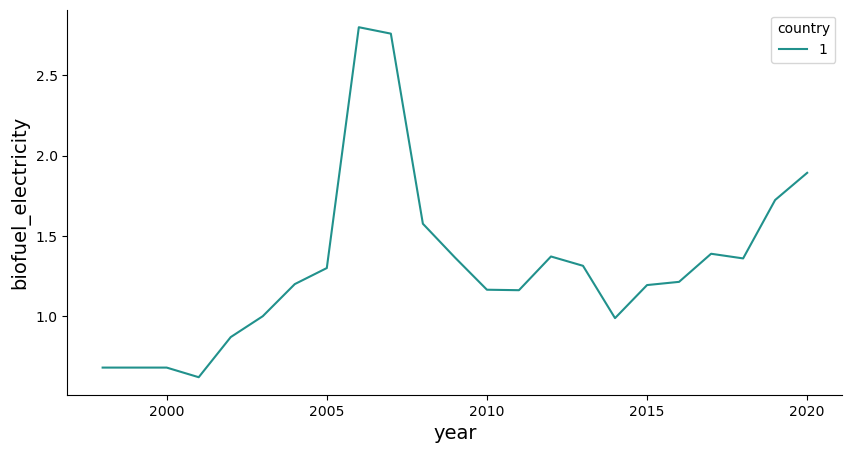

In [693]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='biofuel_electricity', hue='country', data=suram1, palette='viridis')
plt.xlabel('year', size=14)
plt.ylabel('biofuel_electricity', size=14)
sns.despine()
plt.show()


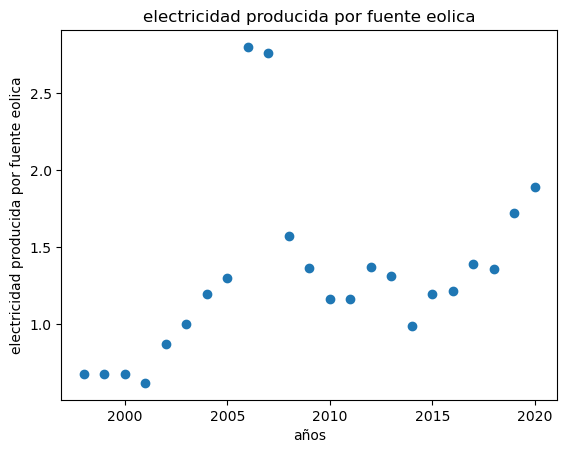

In [694]:
# Se muestra la distribución
import matplotlib.pyplot as plt
plt.scatter(x = suram1['year'], y=suram1['biofuel_electricity'])
plt.title('electricidad producida por fuente eolica')
plt.xlabel('años')
plt.ylabel('electricidad producida por fuente eolica')
plt.show()

In [695]:
suram1

,country,year,biofuel_electricity
0,1,1998,0.680
1,1,1999,0.680
2,1,2000,0.680
3,1,2001,0.620
4,1,2002,0.870
5,1,2003,1.000
6,1,2004,1.200
7,1,2005,1.300
8,1,2006,2.800
9,1,2007,2.760


## MODELO DE REGRESIÓN:

## Lineal

#### Entrenamiento del modelo

Se separan los datos para entrenar y tertear. En este caso de usarán el 80 % y 20 % respectivamente. 

In [696]:
# Se eiliminan aquellas variables que no se incluirán en el modelo y se las guarda en x. 
x= suram1.drop(['biofuel_electricity'], axis=1)

In [697]:
lista_atributos = x.columns

In [698]:
# Se seleccionan las etiquetas y se guardan en y.
y = suram1['biofuel_electricity']

In [699]:
x, y = np.array(x), np.array(y)

In [700]:
x   

array([[   1, 1998],
       [   1, 1999],
       [   1, 2000],
       [   1, 2001],
       [   1, 2002],
       [   1, 2003],
       [   1, 2004],
       [   1, 2005],
       [   1, 2006],
       [   1, 2007],
       [   1, 2008],
       [   1, 2009],
       [   1, 2010],
       [   1, 2011],
       [   1, 2012],
       [   1, 2013],
       [   1, 2014],
       [   1, 2015],
       [   1, 2016],
       [   1, 2017],
       [   1, 2018],
       [   1, 2019],
       [   1, 2020]], dtype=int64)

In [701]:
y[:10]

array([0.68, 0.68, 0.68, 0.62, 0.87, 1.  , 1.2 , 1.3 , 2.8 , 2.76])

In [702]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [703]:
x.shape

(23, 2)

In [704]:
X_train.shape

(18, 2)

In [705]:
X_test.shape

(5, 2)

In [706]:
X_test.shape

(5, 2)

### RANDOM FOREST

In [707]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='mae', random_state=42)

In [708]:
# Se inicia el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=42)

In [709]:
print(datos_entrenamiento.shape)
print(datos_test.shape)

(215, 3)
(54, 3)


In [710]:
# Se entrena el modelo
regresor.fit(X_train, y_train);

In [711]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [712]:
# Se predicen los valores para el set de testeo
y_pred = regresor.predict(X_test)

In [713]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred)

0.5988420000000005

### SUPPORT VECTOR MACHINE

In [714]:
# Se inicia el modelo
regresor_svr = SVR(C=1.0, epsilon=0.2)

In [715]:
# Se entrena el modelo
regresor_svr.fit(X_train, y_train);

In [716]:
regresor_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [717]:
#Se predicen los valores para el set de testeo
y_pred_svr = regresor_svr.predict(X_test)

In [718]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

0.7695508563611134

In [719]:
# Se calcula el error porcentual medio promedio
np.mean((np.abs(y_pred - y_test)/y_test)*100)

23.206471139917678

In [720]:
#Se predicen los valores para el set de training
y_pred_train=regresor.predict(X_train)

In [721]:
mean_absolute_error(y_train,y_pred_train)

0.05243333333333339

## ANÁLISIS Y EVALUACIÓN DEL MODELO MÁS ACORDE PARA LA REGRESIÓN

In [755]:
# Valores para los parametros a optimizar
param_grid_rf = {
    'criterion': ['absolute_error'],
    'n_estimators': [70, 80, 90, 100, 120],
    'max_features': ['log2','sqrt'],
    'max_depth': [1, 3, 5, 10, 20, 50],
    'min_samples_leaf': [1, 3, 5, 10, 20, 50]
}

In [726]:
# Inicializamos un modelo
grid_regresor = RandomForestRegressor(random_state=42)

In [727]:
# Creamos la busqueda
rf_search = GridSearchCV(estimator=grid_regresor, param_grid=param_grid_rf,cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

In [728]:
# Corremos el gridsearch con una validación usando 3 folds.
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

## ¿cuál es el mejor estimador?

In [729]:
rf_search.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=3,
                      max_features='log2', n_estimators=80, random_state=42)

In [730]:
rf_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 80}

In [731]:
rf_search.best_score_

-0.17246270833333316

In [734]:
# Asignamos el mejor estimador a mejor_regresor
mejor_regresor = RandomForestRegressor(criterion='absolute_error', n_estimators=80, max_depth=3, max_features='log2', min_samples_leaf=1)

In [735]:
# Entrenamos el modelo
mejor_regresor.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=3,
                      max_features='log2', n_estimators=80)

In [736]:
# Hacemos la prediccion para el test de evaluación
predicciones = mejor_regresor.predict(X_test)

In [737]:
# Error
evaluation(y_test, predicciones)

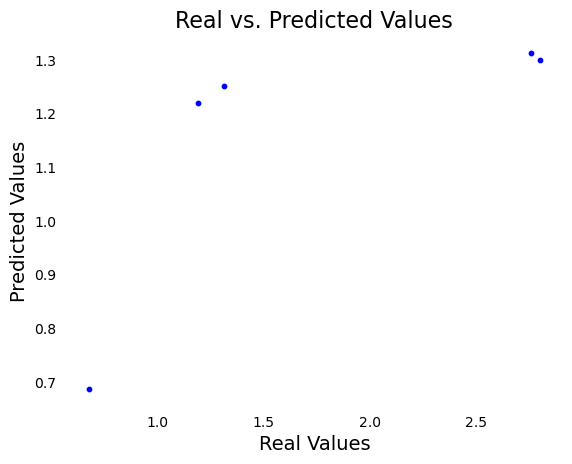

In [752]:
# Correlacion
graph_real_pred(y_test, predicciones, color='#0000FF')
def graph_real_pred(y_test, predicciones, color):
    """
    Function that plots the real vs. predicted values.
    Parameters:
    - y_test: Real values
    - predictions: Predicted values
    - color: Color for the scatter plot
    Returns:
    Scatter plot showing the relationship between real and predicted values
    """
plt.scatter(y_test, predicciones, color='#0000FF', s=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(left=False, right=False, top=False, bottom=False)
plt.xlabel('Real Values', size=14)
plt.ylabel('Predicted Values', size=14)
plt.title('Real vs. Predicted Values', size=16)
plt.show()

In [756]:
# Importancia de cada feature
feature_importance(mejor_regresor, lista_atributos)